<h1><font color=#000066	> Advanced Systems Project: Data Analysis on YELP application reviews. </font></h1>

<br/><i>Analysis performed by: Sujeeth Nidumolu 
<br>Student ID: 700372902</br>
<br>Under the supervision of Dr. Someswar Kesh</br>
<br>Term: Fall-2018</br>
<br>Computer Information Systems - University of Central Missouri</br></i>

<body><br/>Yelp is a trending application designed for the users to publish and read the reviews of local businesses such as restaurants, saloons, automobiles workshops etc. Also, it provides online reservations through Yelp reservations. With the broad range online services generating huge data day to day. 
The goal is to analyze this unorganized data, design a system to generate insights from the Yelp data which could help the entrepreneurs to study the progress of the business and take wise decisions towards betterment of the business. With the Yelp’s data, the primary task is to derive insights from various reviews from customers, data being acquired from various places across USA.
    
<br/><br/>Taking the dataset of "yelp_business", we will determine the top 50 reviewed businesses. Firstly, we need to import the required packages to perform the analysis.</body>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import numpy.random as nr
import math

%matplotlib inline

The cell below reads the yelp_business dataset and feeds the columns into a dataframe.

In [2]:
business = pd.read_csv('yelp_business.csv')#Reads the business data
businessDataFrame = pd.DataFrame(business) #Stores the data into a dataframe

The below cell prints the number of rows and columns in the DataFrame along with it, displaying the top 5 rows of the data for our analysis.

In [3]:
print(businessDataFrame.shape)#Prints the number of rows and columns in a dataframe
businessDataFrame.head(5)#Prints the top 5 rows of the dataframe

(174567, 13)


,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories
0,FYWN1wneV18bWNgQjJ2GNg,"""Dental by Design""",NaN,"""4855 E Warner Rd, Ste B9""",Ahwatukee,AZ,85044,33.330690,-111.978599,4.0,22,1,Dentists;General Dentistry;Health & Medical;Or...
1,He-G7vWjzVUysIKrfNbPUQ,"""Stephen Szabo Salon""",NaN,"""3101 Washington Rd""",McMurray,PA,15317,40.291685,-80.104900,3.0,11,1,Hair Stylists;Hair Salons;Men's Hair Salons;Bl...
2,KQPW8lFf1y5BT2MxiSZ3QA,"""Western Motor Vehicle""",NaN,"""6025 N 27th Ave, Ste 1""",Phoenix,AZ,85017,33.524903,-112.115310,1.5,18,1,Departments of Motor Vehicles;Public Services ...
3,8DShNS-LuFqpEWIp0HxijA,"""Sports Authority""",NaN,"""5000 Arizona Mills Cr, Ste 435""",Tempe,AZ,85282,33.383147,-111.964725,3.0,9,0,Sporting Goods;Shopping
4,PfOCPjBrlQAnz__NXj9h_w,"""Brick House Tavern + Tap""",NaN,"""581 Howe Ave""",Cuyahoga Falls,OH,44221,41.119535,-81.475690,3.5,116,1,American (New);Nightlife;Bars;Sandwiches;Ameri...


In [4]:
businessDataFrame.columns #Prints the columns of the dataset

Index(['business_id', 'name', 'neighborhood', 'address', 'city', 'state',
       'postal_code', 'latitude', 'longitude', 'stars', 'review_count',
       'is_open', 'categories'],
      dtype='object')

In [5]:
businessDataFrame.dtypes #Prints the datatypes of the above columns

business_id      object
name             object
neighborhood     object
address          object
city             object
state            object
postal_code      object
latitude        float64
longitude       float64
stars           float64
review_count      int64
is_open           int64
categories       object
dtype: object

We need checkins dataset to fetch the checkins recorded, the cell below reads the checkins dataset and stores the records into checkins dataframe.

In [6]:
checkin = pd.read_csv('yelp_checkin.csv')
checkinDataFrame = pd.DataFrame(checkin)
checkinDataFrame.columns #Displays the names of the columns in the dataset of checkins

Index(['business_id', 'weekday', 'hour', 'checkins'], dtype='object')

In [7]:
checkinDataFrame.head(5)

,business_id,weekday,hour,checkins
0,3Mc-LxcqeguOXOVT_2ZtCg,Tue,0:00,12
1,SVFx6_epO22bZTZnKwlX7g,Wed,0:00,4
2,vW9aLivd4-IorAfStzsHww,Tue,14:00,1
3,tEzxhauTQddACyqdJ0OPEQ,Fri,19:00,1
4,CEyZU32P-vtMhgqRCaXzMA,Tue,17:00,1


In [8]:
checkinDataFrame.shape #Displays number of rows and columns in the dataset

(3911218, 4)

In [9]:
businessHours = pd.read_csv('yelp_business_hours.csv')
businessHoursDataFrame = pd.DataFrame(businessHours)

In [10]:
businessHoursDataFrame.head()

,business_id,monday,tuesday,wednesday,thursday,friday,saturday,sunday
0,FYWN1wneV18bWNgQjJ2GNg,7:30-17:0,7:30-17:0,7:30-17:0,7:30-17:0,7:30-17:0,None,None
1,He-G7vWjzVUysIKrfNbPUQ,9:0-20:0,9:0-20:0,9:0-20:0,9:0-20:0,9:0-16:0,8:0-16:0,None
2,KQPW8lFf1y5BT2MxiSZ3QA,None,None,None,None,None,None,None
3,8DShNS-LuFqpEWIp0HxijA,10:0-21:0,10:0-21:0,10:0-21:0,10:0-21:0,10:0-21:0,10:0-21:0,11:0-19:0
4,PfOCPjBrlQAnz__NXj9h_w,11:0-1:0,11:0-1:0,11:0-1:0,11:0-1:0,11:0-1:0,11:0-2:0,11:0-0:0


In [11]:
#Checking for null or empty values in the business data:
business.isnull().sum().sort_values(ascending=False)

neighborhood    106552
postal_code        623
longitude            1
latitude             1
state                1
city                 1
categories           0
is_open              0
review_count         0
stars                0
address              0
name                 0
business_id          0
dtype: int64

The above figures state that there are several missing values in 'Neighborhood'=106552.

Now, let us check if there aren't any duplicate business ID's.

In [12]:
business.business_id.is_unique

True

Yes, all business id's are unique.

In [13]:
business.city.value_counts()

Las Vegas                      26775
Phoenix                        17213
Toronto                        17206
Charlotte                       8553
Scottsdale                      8228
Pittsburgh                      6355
Mesa                            5760
Montréal                        5709
Henderson                       4465
Tempe                           4263
Chandler                        3994
Edinburgh                       3868
Cleveland                       3322
Madison                         3213
Glendale                        3206
Gilbert                         3128
Mississauga                     2726
Stuttgart                       2000
Peoria                          1706
Markham                         1564
North Las Vegas                 1393
Champaign                       1195
Scarborough                     1095
North York                      1092
Surprise                        1018
Richmond Hill                    888
Concord                          864
B

### The top 50 reviewed business:

In [14]:
businessDataFrame[['name', 'review_count', 'city', 'stars','categories']].sort_values(ascending=False, by="review_count")[0:50]

,name,review_count,city,stars,categories
97944,"""Mon Ami Gabi""",7361,Las Vegas,4.0,French;Steakhouses;Restaurants;Breakfast & Brunch
119907,"""Bacchanal Buffet""",7009,Las Vegas,4.0,Sandwiches;Buffets;Restaurants;Breakfast & Bru...
69993,"""Wicked Spoon""",5950,Las Vegas,3.5,Buffets;Breakfast & Brunch;Restaurants
81212,"""Gordon Ramsay BurGR""",5447,Las Vegas,4.0,American (Traditional);Burgers;Restaurants
139699,"""Earl of Sandwich""",4869,Las Vegas,4.5,Caterers;Sandwiches;Restaurants;Food Delivery ...
19191,"""Hash House A Go Go""",4774,Las Vegas,4.0,American (New);Restaurants;Breakfast & Brunch
80590,"""The Buffet""",4018,Las Vegas,3.5,Buffets;Restaurants
124412,"""Lotus of Siam""",3964,Las Vegas,4.0,Car Dealers;Thai;Automotive;Seafood;Bars;Wine ...
21006,"""Serendipity 3""",3910,Las Vegas,3.0,Social Clubs;Arts & Entertainment;American (Tr...
93038,"""The Buffet at Bellagio""",3838,Las Vegas,3.5,Buffets;Restaurants;American (New)


### Cities playing majority role in making business:

In [15]:
city_business_counts = business[['city', 'business_id']].groupby(['city'])\
['business_id'].agg('count').sort_values(ascending=False)

In [16]:
city_business_counts = pd.DataFrame(data=city_business_counts)

In [17]:
city_business_counts.rename(columns={'business_id' : 'number_of_businesses'}, inplace=True)

Text(0,0.5,'Cities')

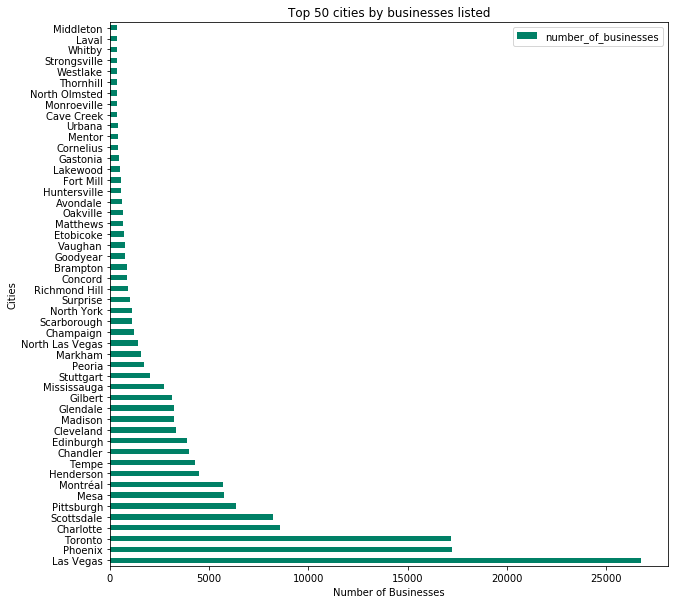

In [18]:
city_business_counts[0:50].sort_values(ascending=False, by="number_of_businesses")\
.plot(kind='barh', stacked=False, figsize=[10,10], colormap='summer')
plt.title('Top 50 cities by businesses listed')#Giving the plot a main title
plt.xlabel('Number of Businesses')#Giving the x-axis a title
plt.ylabel('Cities')#Giving the y-axis a title

### Cities with highest reviews and best ratings for their businesses

In [19]:
city_business_reviews = business[['city', 'review_count', 'stars']].groupby(['city']).\
agg({'review_count': 'sum', 'stars': 'mean'}).sort_values(by='review_count', ascending=False)
city_business_reviews.head(10) 

,review_count,stars
city,,
Las Vegas,1604173,3.709916
Phoenix,576709,3.673793
Toronto,430923,3.487272
Scottsdale,308529,3.948529
Charlotte,237115,3.571554
Pittsburgh,179471,3.629819
Henderson,166884,3.789362
Tempe,162772,3.729885
Mesa,130883,3.636024


Text(0,0.5,'Cities')

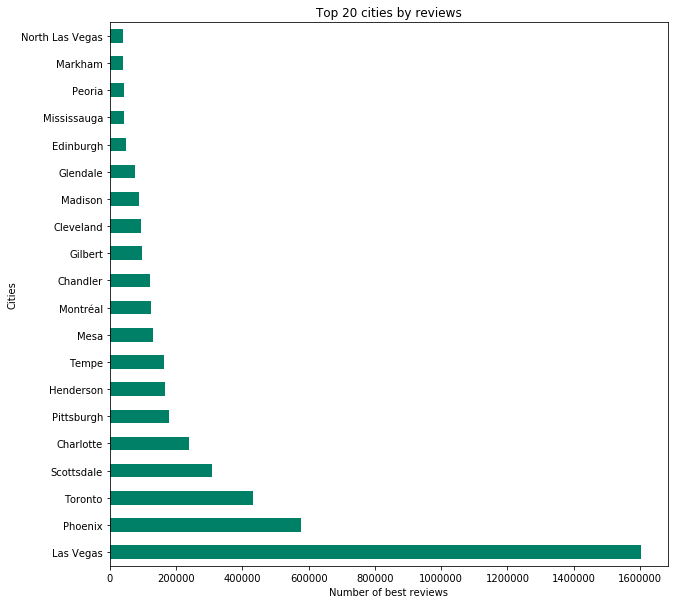

In [20]:
city_business_reviews['review_count'][0:20].plot(kind='barh', stacked=False, figsize=[10,10], \
                                                 colormap='summer')
plt.title('Top 20 cities by reviews') #Giving main title for the graph
plt.xlabel('Number of best reviews') #Giving title for x-axis
plt.ylabel('Cities') #Giving title for y-axis

### Cities with greater than 50k reviews ranked by average stars

Text(0.5,1,'Cities with greater than 50k reviews ranked by average stars')

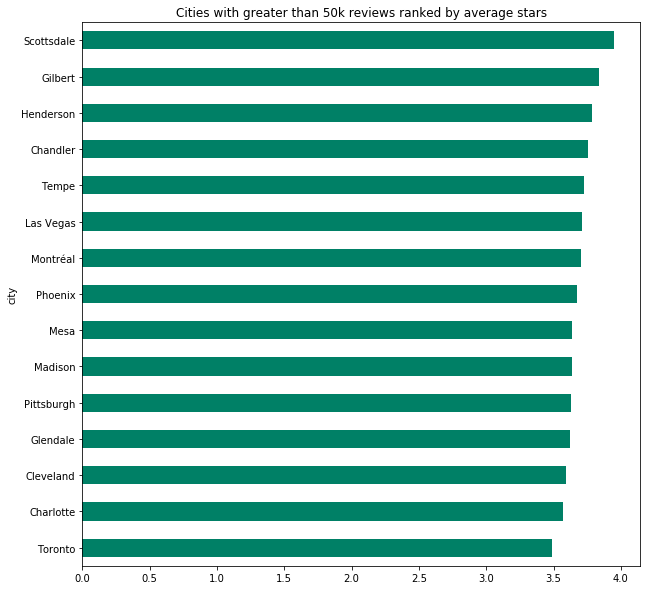

In [21]:
city_business_reviews[city_business_reviews.review_count > 50000]['stars'].sort_values()\
.plot(kind='barh', stacked=False, figsize=[10,10], colormap='summer')
plt.title('Cities with greater than 50k reviews ranked by average stars')

### Distribution of Stars(Ratings)

In [22]:
business['stars'].value_counts()

4.0    33492
3.5    32038
5.0    27540
4.5    24796
3.0    23142
2.5    16148
2.0     9320
1.5     4303
1.0     3788
Name: stars, dtype: int64

Text(0,0.5,'Number of reviews')

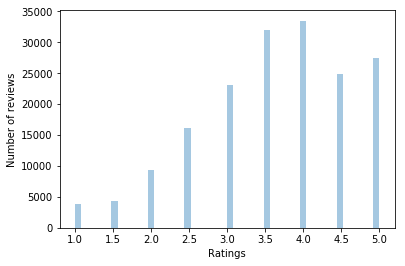

In [23]:
sns.distplot(business.stars, kde=False)
plt.xlabel('Ratings')
plt.ylabel('Number of reviews')

### Open and closed businesses:

In [27]:
business['is_open'].value_counts()

1    146702
0     27865
Name: is_open, dtype: int64